In [1]:
import math
from PIL import Image
import numpy as np

from sciveo.tools.logger import *

In [2]:
#
# Taylor series aproximation of F(x), using n-th differential at point 'a'.
#
# Series calculation using only simple +/- and */, so could be implemented using simple ALU.
#

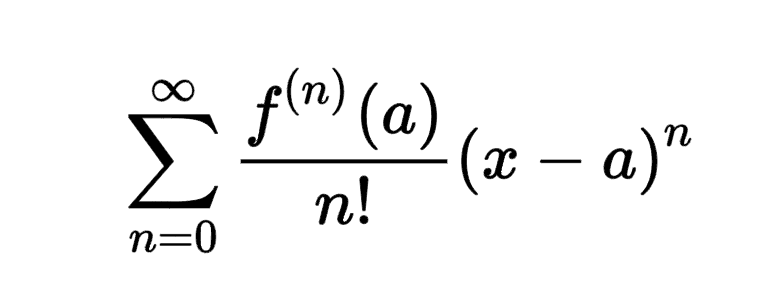

In [3]:
Image.open("taylor_series_formula.png")

In [4]:
# The wise choose of 'a' is important for the successful series aproximation convergence.

In [5]:
# used to stop the series when too small to add (when good convergence)
eps = 1e-9
errors = 0

In [6]:
def test(samples, f1, f2, tag, max_error=1e-6):
  errors = 0
  samples = list(samples)
  for sample in samples:
    if not isinstance(sample, tuple):
      sample = (sample,)
    F1 = f1(*sample, eps=max_error)
    F2 = f2(*sample)
    err = int(abs(F1 - F2) > max_error)
    errors += err
    if err:
      debug(sample, F1, F2, abs(F1 - F2))
  print(f"Test {tag} PASS[{errors==0}] errors[{errors}]/[{len(samples)}] when max_error[{max_error}]")
  return errors

In [7]:
# Exponential functions exp(x), ln(x), power(x, y) etc.

In [8]:
"""
e^x where a = 0, derivatives(a) = 1
"""
def exp(x, eps=1e-9):
  a = 0
  s = 1
  n = 1
  d = 1
  while(True):
    d *= (x - a) / n
    s += d
    if abs(d) < eps:
      break
    n += 1
  debug(f"exp({x}) = {s}", f"iterations {n}")
  return s

In [9]:
errors += test(np.linspace(-10, 10, 1000), exp, math.exp, "EXP", max_error=eps)

Test EXP PASS[True] errors[0]/[1000] when max_error[1e-09]


In [10]:
exp(1)

2.7182818284467594

In [11]:
"""

LN(x) where a = 1,

Need some manual improvements for better convergence

"""
def ln(x, eps=1e-9):
  LN2 = 0.6931471805599453 # ln(2) is hard to converge 

  if x <= 0:
    return "inf"
  if x == 1:
    return 0
  if x == 2.0:
    return LN2

  # Adjust x to be in the range (0, 2) for better convergence
  if x > 2:
    return ln(x / 2) + LN2 # ln(2)
  elif x < 1:
    return - ln(1 / x)

  a = 1
  s = 0
  term = (x - a)
  sign = 1
  d = -1
  for n in range(1, 100000):
    d = sign * (term / n)
    s += d
    if abs(d) < eps:
      break
    term *= (x - a)
    sign *= -1
  debug(f"LN({x}) = {s}  N = {n}, d = {d}")
  return s

In [12]:
errors += test(np.linspace(0.1, 100, 1000), ln, math.log, "LN", max_error=eps)

Test LN PASS[True] errors[0]/[1000] when max_error[1e-09]


In [13]:
"""

X^Y where a = 1,

works only for integer Y

"""
def power_taylor(x, y, eps=1e-9):
  a = 1
  s = 1
  n = 1
  d = 1
  while(True):
    d *= (y - n + 1) * (x - a) / n
    s += d
    if abs(d) < eps or n > 10000:
      break
    n += 1
  debug(f"{x}^{y} = {s}", f"iterations {n}")
  return s


"""

X^Y = exp(Y * ln(X)) 

"""
def power(x, y, eps=1e-9):
  return exp(y * ln(x, 1e-12), 1e-12)

In [14]:
errors += test(
  zip(np.random.uniform(0.0, 10.0, 1000), np.random.randint(0, 10, 1000)),
  power_taylor, np.power, "POWER", max_error=1e-6
)

Test POWER PASS[True] errors[0]/[1000] when max_error[1e-06]


In [15]:
errors += test(
  zip(np.random.uniform(0.0, 10.0, 1000), np.random.uniform(0.0, 10.0, 1000)),
  power, np.power, "POWER", max_error=0.1
)

Test POWER PASS[False] errors[36]/[1000] when max_error[0.1]


In [16]:
# Trigonometric functions

In [17]:
"""
SIN(x), where a = 0 so sin(0)=0 and cos(0)=1, summing only odd cos(0) derivatives.
"""
def sin(x, eps=1e-9):
  a = 0
  s = x
  n = 3
  d = x
  while(True):
    d *= (-1) * x * x / ((n - 1) * n)
    s += d
    if abs(d) < eps:
      break
    n += 2
  debug(f"sin({x}) = {s}", f"iterations {n}")
  return s

In [18]:
"""
COS(x), where a = 0 so sin(0)=0 and cos(0)=1, summing only even cos(0) derivatives.
"""
def cos(x, eps=1e-9):
  a = 0
  s = 1
  n = 2
  d = 1
  while(True):
    d *= (-1) * x * x / ((n - 1) * n)
    s += d
    if abs(d) < eps:
      break
    n += 2
  debug(f"cos({x}) = {s}", f"iterations {n}")
  return s

In [19]:
errors += test(np.linspace(0, 10, 1000), sin, math.sin, "SIN", max_error=eps)

Test SIN PASS[True] errors[0]/[1000] when max_error[1e-09]


In [20]:
errors += test(np.linspace(0, 10, 1000), cos, math.cos, "COS", max_error=eps)

Test COS PASS[True] errors[0]/[1000] when max_error[1e-09]


In [21]:
# Summary of the Taylor series tests

In [22]:
print(f"Summary: {errors} errors for max error {eps}")

Summary: 36 errors for max error 1e-09
